# **Hotel Booking Cancellation Prediction**
### - Dhillon Patel
This project aims to predict whether a hotel booking will be cancelled or not based on various features. This project includes exploring the dataset, preprocessing the data, and building predictive models using Random Forest, Gradient Boosting, and Decision Tree.

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and Understanding of the Data

This dataset was found on Kaggle and created by user: Ahsan Raza
  -  https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data.

In [73]:
df = pd.read_csv('../data/HotelReservations.csv')
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [74]:
# Display number of rows and columns in the df
df.shape

(36275, 19)

In [75]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [76]:
# Check for missing values
missing_count = df.isnull().sum()

missing_count

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Data Preprocessing

Convert categorical variables to binary using one-hot encoding before exploratory analysis

In [77]:
from sklearn.preprocessing import OneHotEncoder

# Encode target variable
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

# Define the columns to encode
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convert the encoded data to a DataFrame with integer type
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols)).astype(int)

# Drop the original categorical columns and merge the encoded columns back
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

# Display the updated DataFrame
display(df.head())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0,0,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0,0,0,0,0,0,0,0,0,1
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0,0,0,0,0,0,0,0,0,1
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0,0,0,0,0,0,0,0,0,1
4,INN00005,2,0,1,1,0,48,2018,4,11,...,0,0,0,0,0,0,0,0,0,1


## Exploratory Data Analysis: Understanding the Target Variable

The target variable in this dataset is `booking_status`. This section includes visualizing the distribution of booking_status and the top correlated variables to understand the balance between "Cancelled" and "Not Cancelled" bookings.

Top correlations with booking_status:
lead_time                              0.44
no_of_special_requests                 0.25
arrival_year                           0.18
avg_price_per_room                     0.14
market_segment_type_Corporate          0.11
repeated_guest                         0.11
market_segment_type_Online             0.11
no_of_week_nights                      0.09
no_of_adults                           0.09
type_of_meal_plan_Meal Plan 2          0.09
required_car_parking_space             0.09
market_segment_type_Complementary      0.07
no_of_weekend_nights                   0.06
no_of_previous_bookings_not_canceled   0.06
market_segment_type_Offline            0.04
no_of_previous_cancellations           0.03
no_of_children                         0.03
room_type_reserved_Room_Type 6         0.03
room_type_reserved_Room_Type 7         0.01
room_type_reserved_Room_Type 4         0.01
arrival_month                          0.01
arrival_date                          

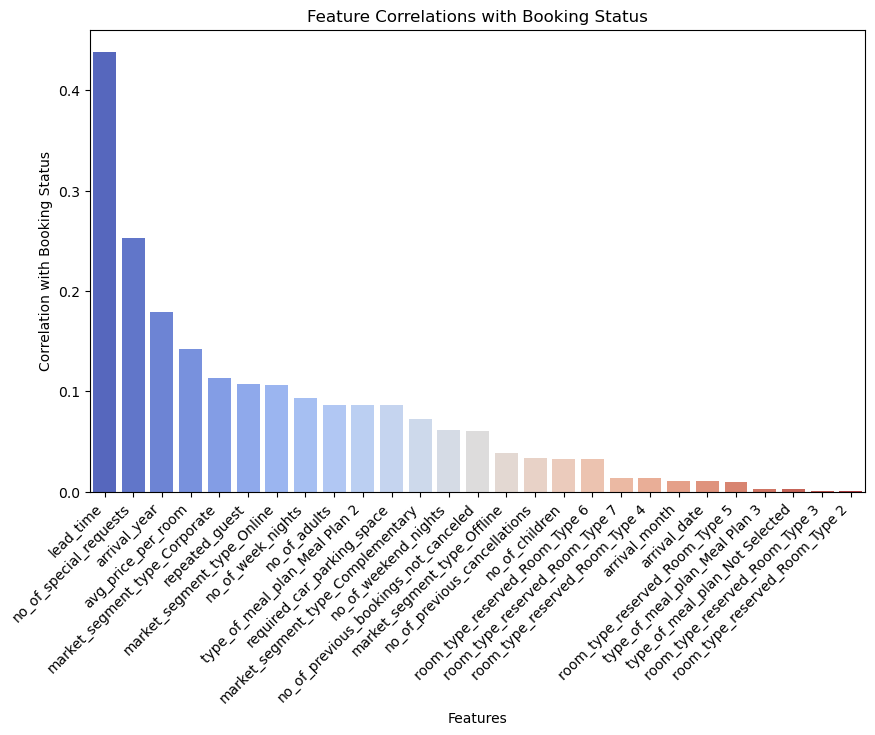

In [78]:
# Drop Booking_ID as it is unnecessary
df_numeric = df.drop(columns=['Booking_ID'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Get correlations with the target variable
target_correlation = correlation_matrix["booking_status"].drop("booking_status")

# Sort by absolute correlation values
target_correlation = target_correlation.abs().sort_values(ascending=False)

# Print top correlated variables with the target
print("Top correlations with booking_status:")
print(target_correlation)

# Visualize with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values, hue=target_correlation.index, palette="coolwarm", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlation with Booking Status")
plt.xlabel("Features")
plt.title("Feature Correlations with Booking Status")
plt.show()

In [79]:
# Load non-encoded new dataframe
descriptive_stats_df = pd.read_csv('../data/hotelReservations.csv')

# Display descriptive statistics for continous variables most correlated with booking_status
descriptive_stats_df[['lead_time', 'no_of_special_requests', 'arrival_year', 'avg_price_per_room', 'market_segment_type']].describe()

,lead_time,no_of_special_requests,arrival_year,avg_price_per_room
count,36275.00,36275.00,36275.00,36275.00
mean,85.23,0.62,2017.82,103.42
std,85.93,0.79,0.38,35.09
min,0.00,0.00,2017.00,0.00
25%,17.00,0.00,2018.00,80.30
50%,57.00,0.00,2018.00,99.45
75%,126.00,1.00,2018.00,120.00
max,443.00,5.00,2018.00,540.00


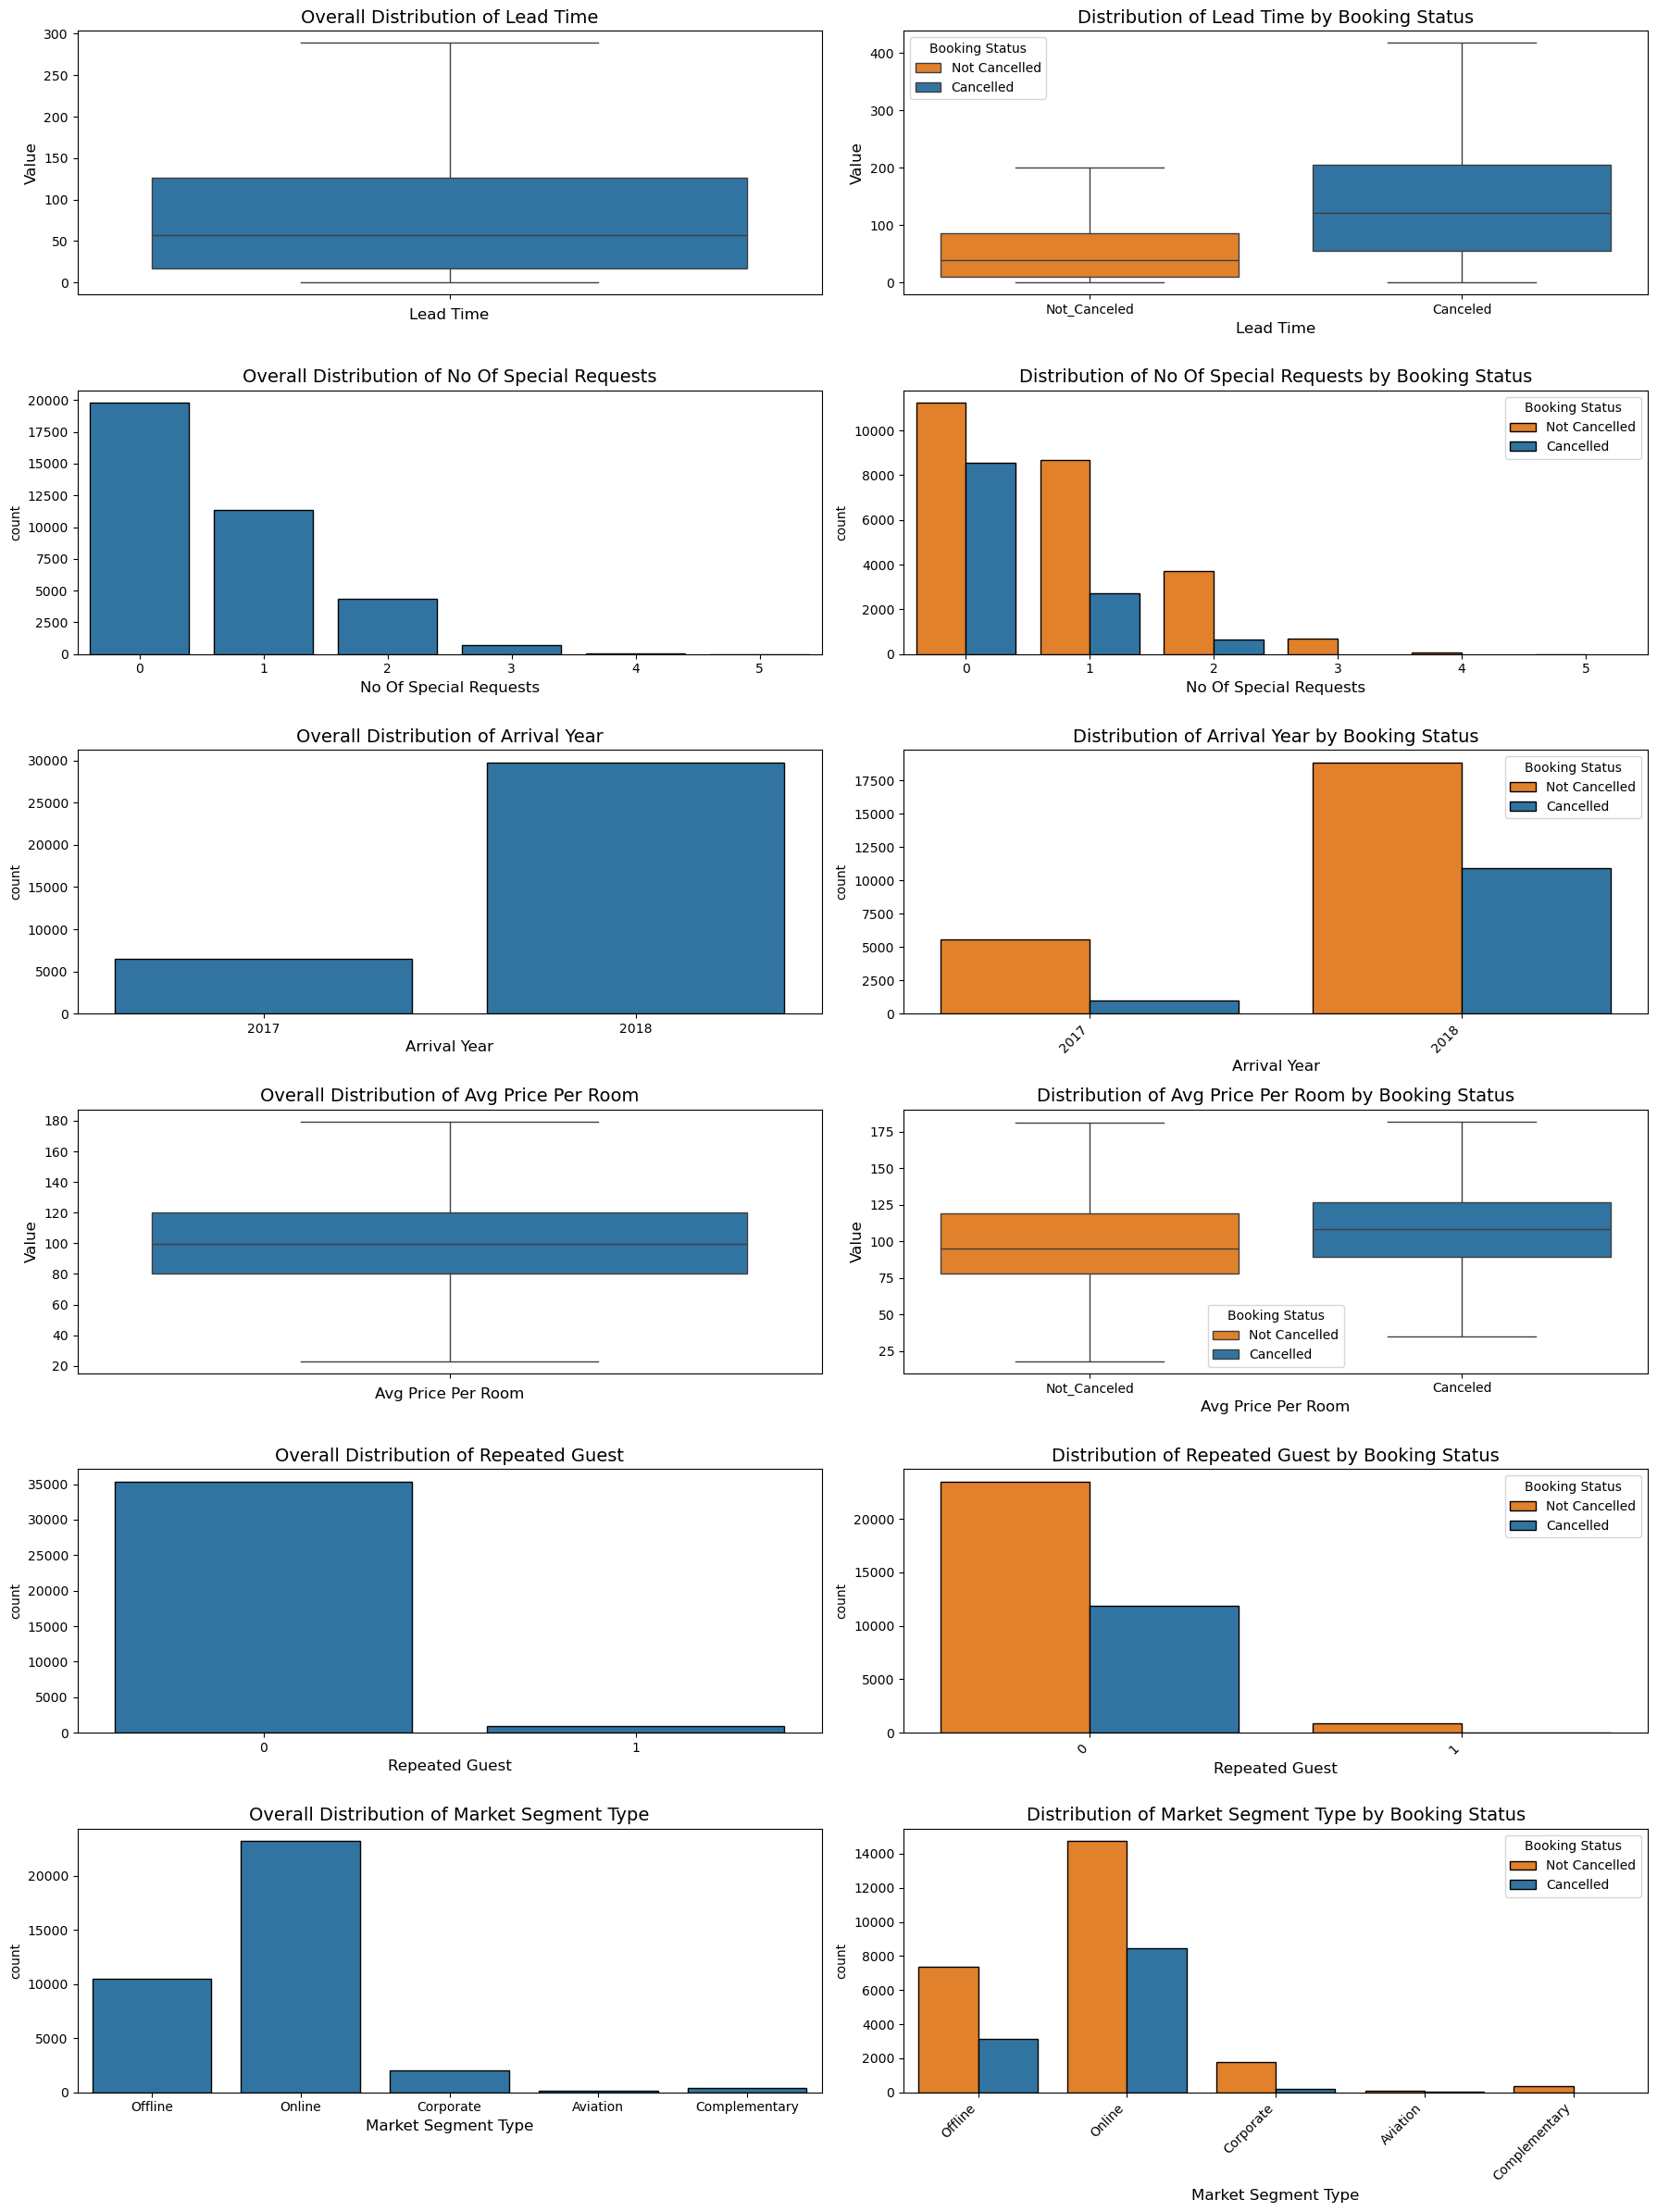

In [80]:
# Allow usage of specific default colors
default_palette = sns.color_palette()

# Define plot types
plot_functions = {
    'lead_time': sns.boxplot,
    'no_of_special_requests': sns.countplot,
    'arrival_year': sns.countplot,
    'avg_price_per_room': sns.boxplot,
    'repeated_guest': sns.countplot,
    'market_segment_type': sns.countplot,
}

features = list(plot_functions.keys())

# Create subplots
fig, axes = plt.subplots(nrows=len(features), ncols=2, figsize=(18, 4 * len(features)))

def format_plot(ax, xlabel, title):
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_title(title, fontsize=14)

def add_bar_borders(ax):
    for bar in ax.patches:
        bar.set_edgecolor('black')

# Display the visualizations
for i, feature in enumerate(features):
    plot_func = plot_functions[feature]
    xlabel = feature.replace('_', ' ').title()

    ax1 = axes[i, 0]
    if feature in ['lead_time', 'avg_price_per_room']:
        plot_func(y=feature, data=descriptive_stats_df, ax=ax1, showfliers=False)
        ax1.set_ylabel("Value", fontsize=12)
    else:
        sns.countplot(x=feature, data=descriptive_stats_df, ax=ax1, color=default_palette[0])
        add_bar_borders(ax1)

    format_plot(ax1, xlabel, f"Overall Distribution of {xlabel}")

    ax2 = axes[i, 1]
    if feature in ['lead_time', 'avg_price_per_room']:
        plot_func(
            x='booking_status', y=feature, data=descriptive_stats_df, ax=ax2,
            showfliers=False, hue='booking_status',
            palette=[default_palette[1], default_palette[0]],
        )
        ax2.set_ylabel("Value", fontsize=12)
    else:
        sns.countplot(x=feature, hue='booking_status', data=descriptive_stats_df,
                      ax=ax2, palette=[default_palette[1], default_palette[0]])
        add_bar_borders(ax2)

    format_plot(ax2, xlabel, f"Distribution of {xlabel} by Booking Status")

    # Rotate x-axis labels for categorical features
    if feature in ['market_segment_type', 'arrival_year', 'repeated_guest']:
        ax2.set_xticks(ax2.get_xticks())
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

    # Add legend to the second subplot
    ax2.legend(title='Booking Status', labels=['Not Cancelled', 'Cancelled'])

plt.tight_layout()
plt.show()

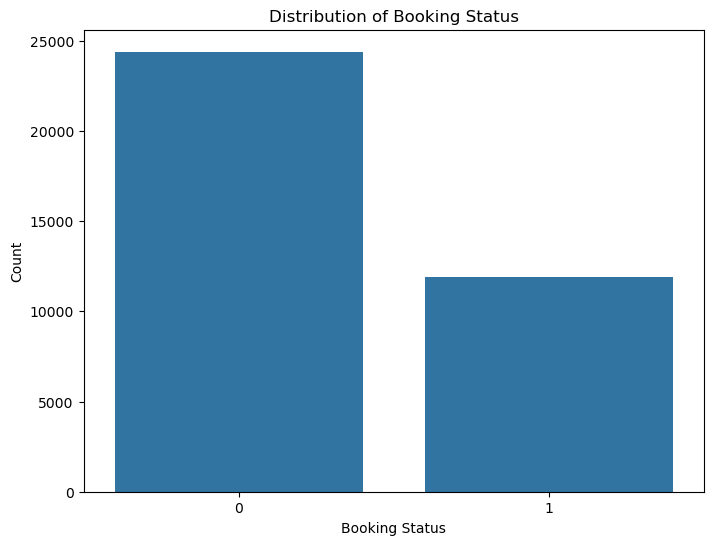

In [81]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='booking_status', data=df)
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

## Exploratory Analysis Conclusion

The exploratory analysis revealed several key insights influencing hotel booking cancellations:

1. **Lead Time:** Bookings with longer lead times tend to have a higher cancellation rate. This suggests that customers who book further in advance may be more likely to change their plans.
2. **Number of Special Requests:** The likelihood of cancellation decreases as the number of special requests increases, indicating an inverse relationship. This suggests that guests who make special requests could be more commited to following through with their stay.
3. **Arrival Year:** There is an increase in bookings and cancellations between 2017 and 2018. This increase is likely due to external factors during those periods which could explain this trend.
4. **Average Price per Room:** Higher room prices are associated with increased cancellation rates, suggesting that customers are sensitive to price changes.
5. **Repeated Guest:** Repeat guests have a significantly lower cancellation rate compared to first-time guests. This indicates that customer loyalty may reduce cancellations.
6. **Market Segment Type:** Cancellation rates vary across market segments, highlighting the importance of understanding segment-specific behaviors for targeted interventions.
7. **Booking Status:** The distribution reveals a class imbalance, with significantly more non-cancelled bookings than cancelled ones. This imbalance is important to consider, as it can introduce biases in predictive modeling and can affect the accuracy of cancellation predictions.


## Model Preparation
- Exclude `Booking_ID` due to it's high cardinality
- Split the data into training, test, and validation sets.

In [82]:
from sklearn.model_selection import train_test_split

# Exclude 'Booking_ID' as it has high cardinality and separate the target variable
X = df.drop(['Booking_ID', 'booking_status'], axis=1)
y = df['booking_status']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display set counts by class
train = y_train.value_counts()
print(train)

val = y_val.value_counts()
print(val)

test = y_test.value_counts()
print(test)

booking_status
0    13686
1     6627
Name: count, dtype: int64
booking_status
0    3428
1    1651
Name: count, dtype: int64
booking_status
0    7276
1    3607
Name: count, dtype: int64


## Baseline Model: Decision Tree

A decision tree is used as a baseline model to understand feature importance and evaluate initial performance.

Validation Accuracy: 0.8643433746800552
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3428
           1       0.81      0.76      0.79      1651

    accuracy                           0.86      5079
   macro avg       0.85      0.84      0.84      5079
weighted avg       0.86      0.86      0.86      5079

Test Accuracy: 0.8739318202701462
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7276
           1       0.83      0.78      0.80      3607

    accuracy                           0.87     10883
   macro avg       0.86      0.85      0.86     10883
weighted avg       0.87      0.87      0.87     10883



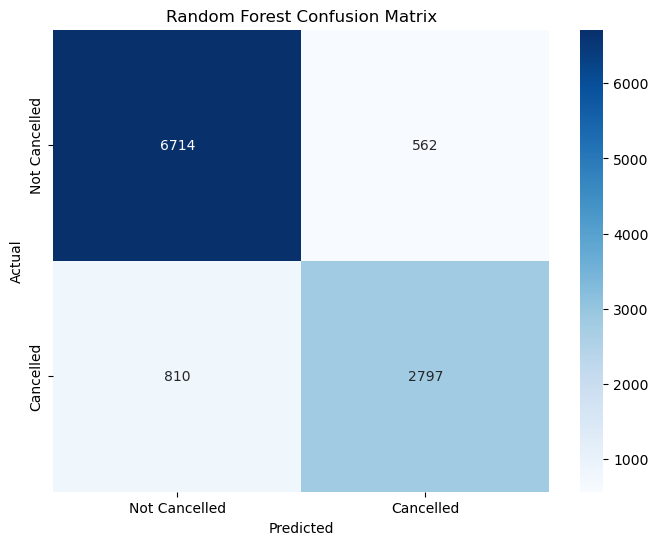

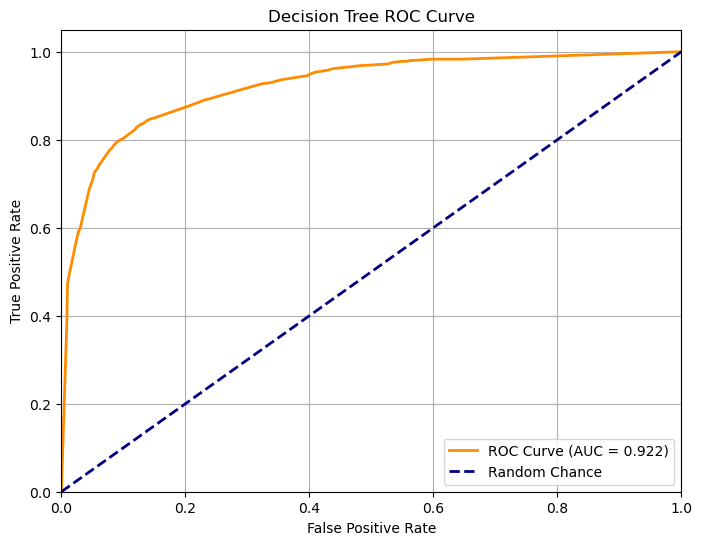

Decision Tree AUC Score: 0.922


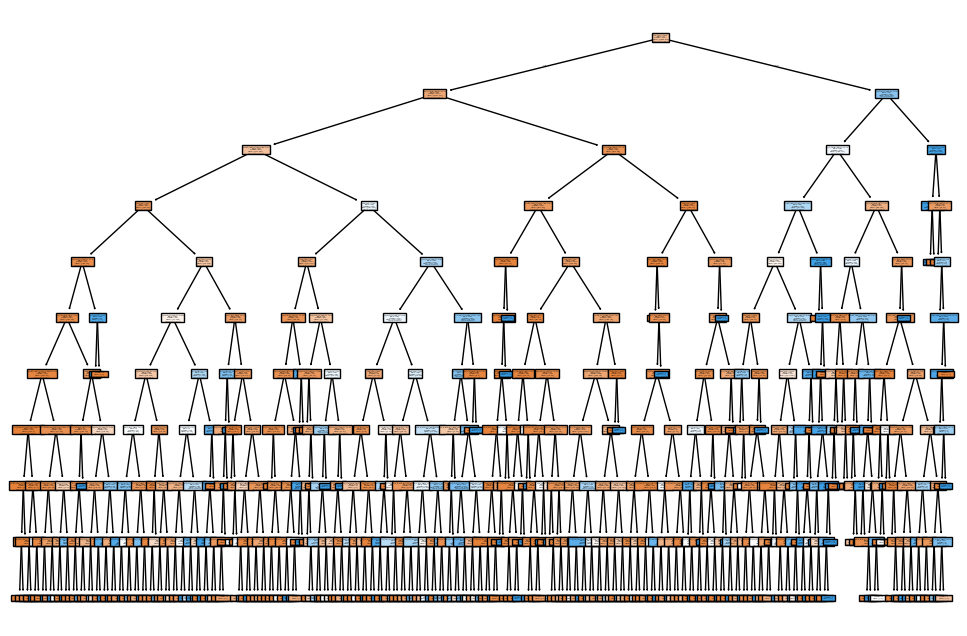

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.tree import plot_tree


# Create a decision tree classifier with max depth of 10
dt_model = DecisionTreeClassifier(max_depth=10)

# Train the model using the training set
dt_model.fit(X_train, y_train)

# Make predictions on the test and validation data
y_pred_dt = dt_model.predict(X_test)

y_predVal_dt = dt_model.predict(X_val)

# Calculate the accuracy of the model
accuracy2_dt = accuracy_score(y_val, y_predVal_dt)
print("Validation Accuracy:", accuracy2_dt)
print(classification_report(y_val, y_predVal_dt))

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy:", accuracy_dt)
print(classification_report(y_test, y_pred_dt))

# Display confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# Get probability scores for the positive class
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC Score
print(f"Decision Tree AUC Score: {roc_auc_dt:.3f}")

# Plot decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Cancelled', 'Cancelled'], filled=True)
plt.show()


## Random Forest Model

A Random Forest Classifier is implemented to improve performance by leveraging an ensemble of decision trees.

Validation Accuracy: 0.8938767473912187
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3428
           1       0.87      0.79      0.83      1651

    accuracy                           0.89      5079
   macro avg       0.89      0.87      0.88      5079
weighted avg       0.89      0.89      0.89      5079

Test Accuracy: 0.9006707709271341
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7276
           1       0.89      0.80      0.84      3607

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



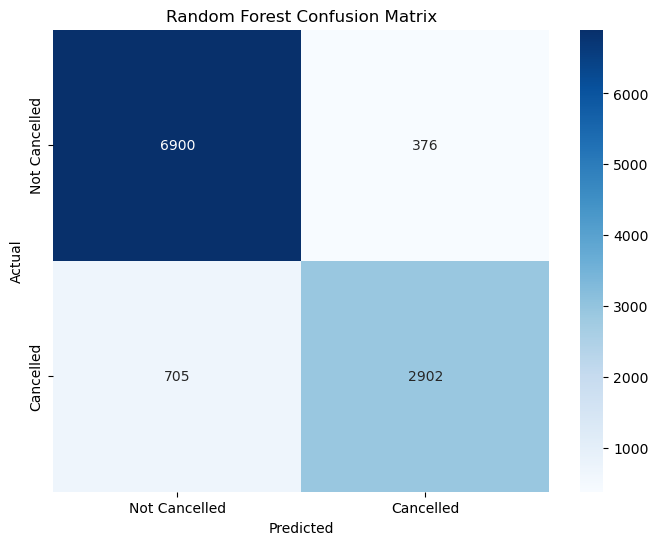

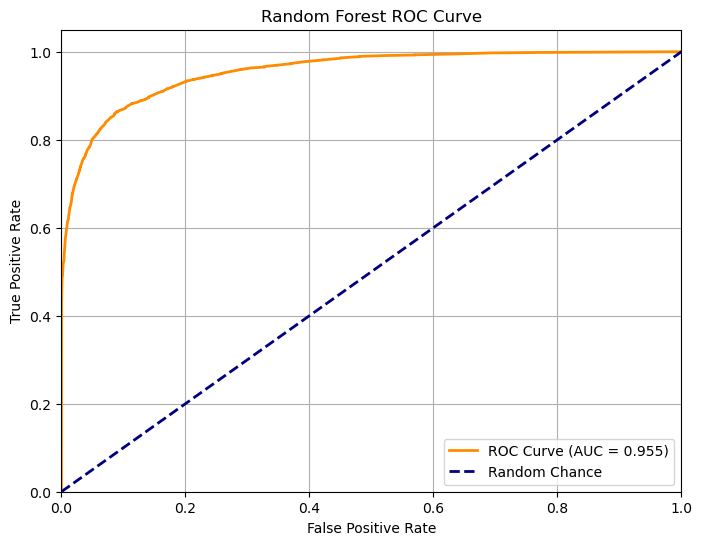

Random Forest AUC Score: 0.955


In [84]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test and validation set
y_pred_rf = rf_model.predict(X_test)

y_predVal_rf = rf_model.predict(X_val)

# Evaluate the model

# Calculate the accuracy of the model
accuracy2_rf = accuracy_score(y_val, y_predVal_rf)
print("Validation Accuracy:", accuracy2_rf)
print(classification_report(y_val, y_predVal_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

# Display Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Get probability scores for the positive class
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC Score
print(f"Random Forest AUC Score: {roc_auc_rf:.3f}")

In [85]:
# Get feature importances of Random Forest to understand model influence
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 6 feature importances
feature_importances.head(6)

,Feature,Importance
5,lead_time,0.31
12,avg_price_per_room,0.16
13,no_of_special_requests,0.11
8,arrival_date,0.09
7,arrival_month,0.08
3,no_of_week_nights,0.05


## Gradient Boosting Model

A Gradient Boosting model is used to evaluate its performance alongside the Random Forest model.

Validation Accuracy: 0.8485922425674345
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3428
           1       0.81      0.69      0.75      1651

    accuracy                           0.85      5079
   macro avg       0.84      0.81      0.82      5079
weighted avg       0.85      0.85      0.85      5079

Test Accuracy: 0.8527979417440044
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7276
           1       0.83      0.70      0.76      3607

    accuracy                           0.85     10883
   macro avg       0.85      0.81      0.83     10883
weighted avg       0.85      0.85      0.85     10883



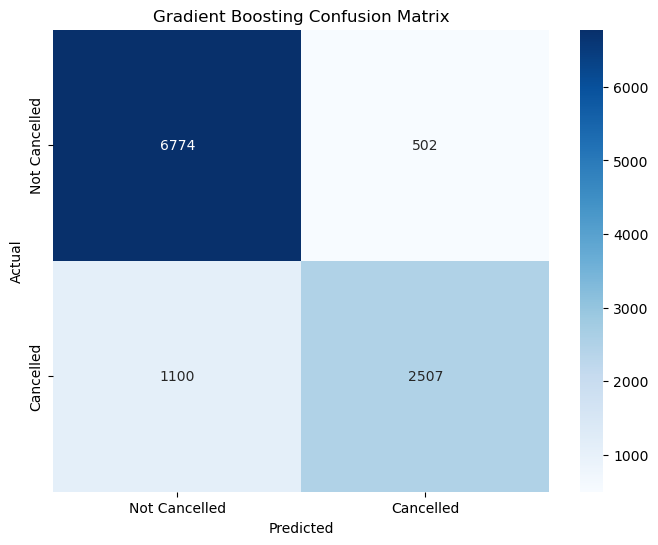

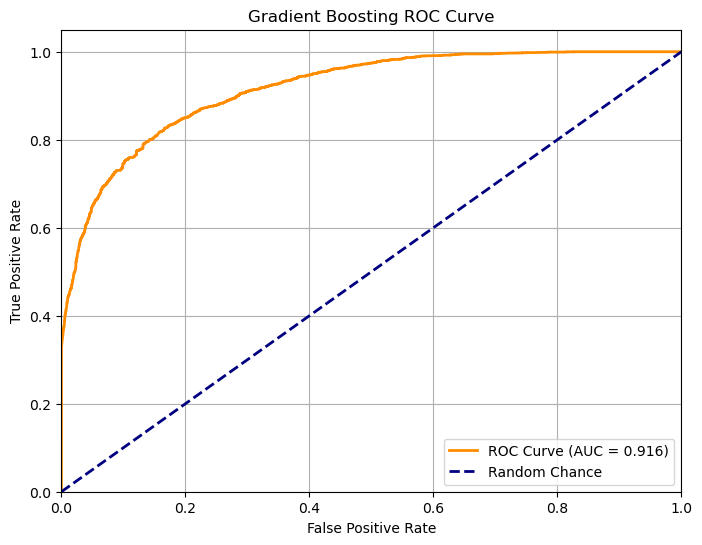

Gradient Boosting AUC Score: 0.916


In [86]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

y_predVal_gb = gb_model.predict(X_val)

# Evaluate the model

# Calculate the accuracy of the model
accuracy2_gb = accuracy_score(y_val, y_predVal_gb)
print("Validation Accuracy:", accuracy2_gb)
print(classification_report(y_val, y_predVal_gb))

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Test Accuracy:", accuracy_gb)
print(classification_report(y_test, y_pred_gb))

# Display confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# Get probability scores for the positive class
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_gb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC Score
print(f"Gradient Boosting AUC Score: {roc_auc_gb:.3f}")

In [87]:
# Get feature importances from the Gradient Boosting Model to understand model influence
importances = gb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Display the ranked features
feature_importances.head(6)

,Feature,Importance
5,lead_time,0.43
13,no_of_special_requests,0.17
26,market_segment_type_Online,0.14
12,avg_price_per_room,0.13
7,arrival_month,0.05
0,no_of_adults,0.02


## Model Evaluation

To assess the performance of the models, the following metrics are considered:

- **Accuracy**: Measures the overall correctness of the model.
  - Due to the target variable class imbalance found in the data exploration, the other metrics should be closely considered as accuracy can be misleading.
- **Precision**: The proportion of correctly predicted positive observations to total predicted positives.  
- **Recall**: The proportion of correctly predicted positive observations to all actual positives.  
- **F1-score**: The mean of precision and recall.  
- **AUC-ROC**: The ability of the model to distinguish between classes.

In [88]:
# Construct a classification report across all 3 models
models = {'Decision Tree': dt_model, 'Random Forest': rf_model, 'Gradient Boosting': gb_model}
evaluation_results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict=True)
    roc_score = roc_auc_score(y_test, y_pred_prob)

    evaluation_results[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-score': report['1']['f1-score'],
        'ROC': roc_score
    }

# Display results in a dataframe
eval_df = pd.DataFrame(evaluation_results).T
display(eval_df)

,Accuracy,Precision,Recall,F1-score,ROC
Decision Tree,0.87,0.83,0.78,0.80,0.92
Random Forest,0.90,0.89,0.80,0.84,0.96
Gradient Boosting,0.85,0.83,0.70,0.76,0.92



## **Model Selection:** Random Forest

After evaluating the performance of all three models, the Random Forest Classifier is determined to be the best-performing model based on the classification metrics.  

#### **Justification:**  

1. **Highest Overall Accuracy (90%)**  
   - Random Forest provides the most correct predictions overall, making it the most reliable model.  

2. **Best Precision (89%)**  
   - It reduces false positives better than the other models, avoiding incorrectly predicting a cancellation.  

3. **Strong Recall (80%)**  
   - The Random Forest model demonstrates the strongest recall (80.40%). This suggests that Random Forest is more effective at correctly identifying cancelled bookings.

4. **Highest F1-score (84%)**  
   - This metric balances precision and recall, confirming that it is the best-rounded model for classifying.  

5. **Best AUC-ROC Score (96%)**  
   - This metric suggests that the model effectively distinguishes between the two classes, making it the optimal choice for predicting booking cancellations.

### **Conclusion**  

The Random Forest Classifier consistently outperforms the other models across all key metrics, demonstrating a strong balance between reducing false positives and capturing true cancellations. Ultimately, the Random Forest Classifier is the ideal choice for predicting hotel booking cancellations for this dataset.